<a href="https://colab.research.google.com/github/AdityakumarSrivastwa/Expension-production-app-mern/blob/main/Butterworth_low_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

**# Step 3: Load an Image**

In [4]:
image = cv2.imread('/content/Image1.jpeg', 0)

**# Step 4: Convert to Frequency Domain**

In [5]:
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

In [6]:
dft_shift = np.fft.fftshift(dft)

**# Step 5: Create the Butterworth Low-Pass Filter**

In [7]:
rows, cols = image.shape

In [8]:
crow, ccol = rows // 2, cols // 2



In [9]:
D0 = 30  # cutoff frequency

In [10]:
n = 2  # order of the Butterworth filter

In [11]:
x, y = np.ogrid[:rows, :cols]

In [15]:
mask = 1 / (1 + ((x - crow) ** 2 + (y - ccol) ** 2) ** (0.5 * n) / D0 ** (0.5 * n))

**#  Ensure the mask has the same shape as dft_shift**

In [18]:
mask = np.stack((mask, np.zeros_like(mask)), axis=2)


**# Step 6: Apply the Filter**

In [19]:
fshift = dft_shift * mask

**# Step 7: Inverse Transform**

In [20]:
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


**# Step 8: Display the Results**

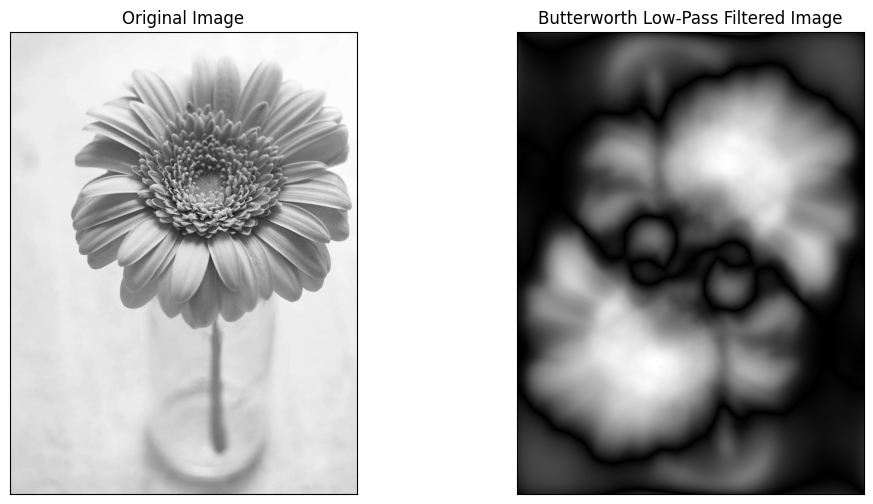

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Butterworth Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()